**Name**: Abdelrahman Mohamed Abdelnabi

**ID**: 3466

# Sheet 5: SVM

In [1]:
import numpy as np
import re
from matplotlib import pyplot as plt
import os
from numpy import linalg
from sklearn.neighbors import NearestNeighbors
from mpl_toolkits.mplot3d import Axes3D
from math import log
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings('ignore')
from sklearn import svm
from sklearn.ensemble import VotingClassifier

# print images/plots in the notebook itself
%matplotlib inline

In [2]:
q3_data = np.array([[2,2],[5,2],[5,3],[5,4],[6,3],[6,4],[6,5],[8,5],
                   [2,1],[2,3],[2,4],[3,2],[3,3],[4,3],[5,1],
                   [7,2],[10,1],[10,3],[10,5],[11,3],[11,4],[12,2],[13,5]])
q3_data = q3_data.reshape(23, 2)
q3_labels = [1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,3,3,3,3,3,3,3,3]

In [3]:
def plot_contours(ax, clf, xx, yy, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out



In [4]:
def make_meshgrid(x, y, h=.02):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy

# Part A

## 1
We need three binary SVM classifiers to classify a new sample. The $i_{th}$ classifier classifies samples as $Class_i$ or not $Class_i$.


## 2
<img src="rbf-sketch.png">

## 3
The figure shows the separating hyperplane and the margins of the linear classifier that separate class $C_3$ and other classes. Samples $(5,1)$, $(8,5)$, and $(7,2)$ are on the margins.

<img src="c3clf.png">


Since the negative class has 2 support vectors and the postive class has one support vector, I would give the support vectors of the -ve class half the weight of that of the postive

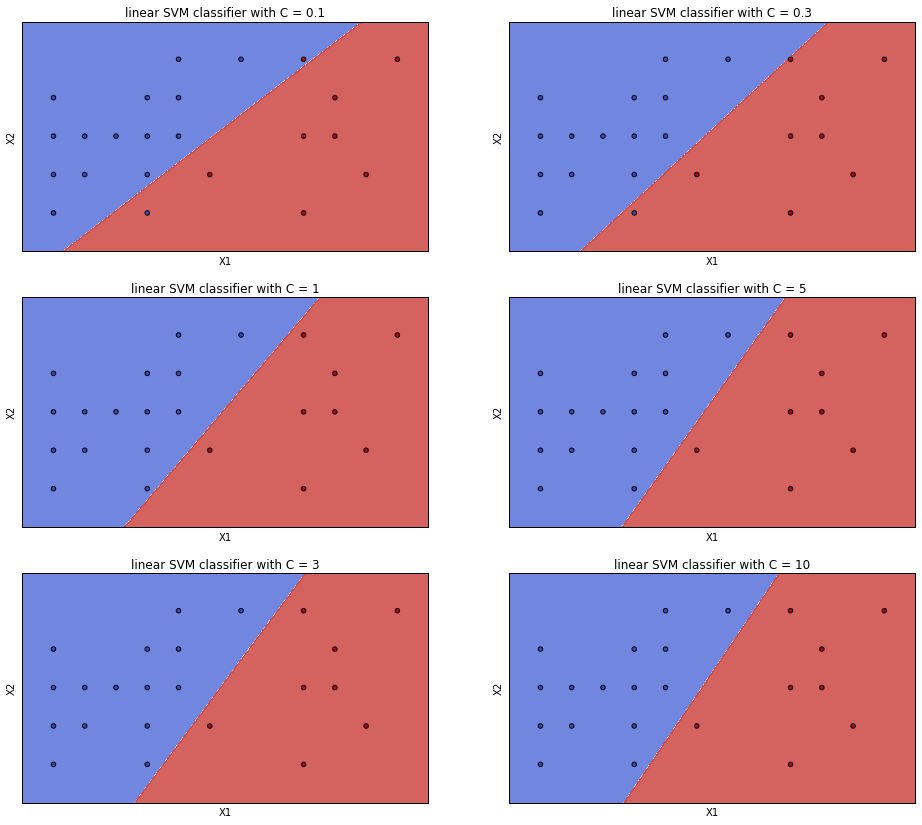

In [5]:
clfs = []
Cs = [0.1, 0.3, 1, 5, 3, 10]

plt.rcParams['figure.figsize'] = (16, 14)
fig, sub = plt.subplots(3,2)

#plt.subplots_adjust(wspace=0.4, hspace=0.4)
X0, X1 = q3_data[:, 0], q3_data[:, 1]

for c, ax in zip(Cs, sub.flatten()):
    clf = svm.LinearSVC(C=c)
    clf.fit(q3_data, q3_labels)
    clfs.append(clf)
        
    xx, yy = make_meshgrid(X0, X1)

    plot_contours(ax, clf, xx, yy,
                      cmap=plt.cm.coolwarm, alpha=0.8)
    ax.scatter(X0, X1, c=q3_labels, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xlabel('X1')
    ax.set_ylabel('X2')
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title("linear SVM classifier with C = {}".format(c))


## Classification using ensemble

In [7]:
estimators = [("SVM-C{}".format(c), clf) for c, clf in zip(Cs, clfs)]

In [8]:
eclf = VotingClassifier(estimators=estimators, voting='hard')

In [9]:
p1 = [6,6]
p2 = [9,4]
p3 = [8,4]
eclf.fit(q3_data, q3_labels)
print eclf.predict(p1)
print eclf.predict(p2)
print eclf.predict(p3)

[1]
[3]
[1]


# Part B: Linear Regession

## 1
We need to learn 3 parameters $\theta_0$, $\theta_1$ and $\theta_2$

## 2
The normal equation for least squares linear regression is:

$$\theta = (X^TX)^{-1}X^Ty$$

Our data matrix, $X$ after appending a column of 1's is:

$$X=\begin{bmatrix}
1 & 1 & 5 \\
1 & 2 & 6 \\
1 & 2 & 10 \\
1 & 2 & 12 \\
1 & 3 & 17 \\
1 & 3 & 12 \\
1 & 4 & 6 \\
1 & 4 & 5 \\
1 & 4 & 7 \\
1 & 5 & 10 \\
\end{bmatrix}$$


We begin by calculating the value of $X^TX$:

$$X^TX = \begin{bmatrix}
1 & 1 & 1 & 1 & 1 & 1 & 1 & 1 & 1 & 1 \\
1 & 2 & 2 & 2 & 3 & 3 & 4 & 4 & 4 & 5 \\
5 & 6 & 10 & 12 & 17 & 12 & 6 & 5 & 7 & 10 \\
\end{bmatrix}
\begin{bmatrix}
1 & 1 & 5 \\
1 & 2 & 6 \\
1 & 2 & 10 \\
1 & 2 & 12 \\
1 & 3 & 17 \\
1 & 3 & 12 \\
1 & 4 & 6 \\
1 & 4 & 5 \\
1 & 4 & 7 \\
1 & 5 & 10 \\
\end{bmatrix}$$
$$ X^TX = \begin{bmatrix}
10 & 30 & 90 \\
30 & 104 & 270 \\
90 & 270 & 948
\end{bmatrix}$$


Taking the inverse of this matrix yields:

$$(X^TX)^{-1} = \begin{bmatrix}
1.330 & -0.214 & -0.065 \\
-0.214 & 0.071 & 0.000 \\
-0.065 & -0.000 & 0.007 \\
\end{bmatrix}
$$
multiplying the result by $X^T$:
 $$
 (X^TX)^{-1}X^T = \begin{bmatrix}
 1.330 & -0.214 & -0.065 \\
 -0.214 & 0.071 & 0.000 \\
 -0.065 & -0.000 & 0.007 \\
 \end{bmatrix}
  \begin{bmatrix}
 1 & 1 & 1 & 1 & 1 & 1 & 1 & 1 & 1 & 1 \\
 1 & 2 & 2 & 2 & 3 & 3 & 4 & 4 & 4 & 5 \\
 5 & 6 & 10 & 12 & 17 & 12 & 6 & 5 & 7 & 10 \\
 \end{bmatrix}
 $$
 $$
 = \begin{bmatrix}
0.789 & 0.510 & 0.249 & 0.119 & -0.422 & -0.096 & 0.081 & 0.147 & 0.016 & -0.394 \\
-0.143 & -0.071 & -0.071 & -0.071 & 0.000 & 0.000 & 0.071 & 0.071 & 0.071 & 0.143 \\
-0.029 & -0.022 & 0.007 & 0.022 & 0.058 & 0.022 & -0.022 & -0.029 & -0.014 & 0.007
\end{bmatrix}
 $$
 
 Multiplying the result by $y$:
 
 $$\theta = \begin{bmatrix}
 -7.988 \\ 4.286 \\ 4.348
 \end{bmatrix}$$

In [10]:
qb_data = [[1,5],[2,6],[2,10],[2,12],[3,17],[3,12],[4,6],[4,5],[4,7],[5,10]]

In [11]:
qb_target = [10,40,50,60,70,50,30,20,40,70]

In [12]:
xtx = np.array([[10,30,90],[30,104,270],[90,270,948]]).reshape(3,3)
print linalg.inv(xtx)

[[  1.32981366e+00  -2.14285714e-01  -6.52173913e-02]
 [ -2.14285714e-01   7.14285714e-02   1.85180833e-17]
 [ -6.52173913e-02  -9.69721198e-18   7.24637681e-03]]


In [13]:
X = np.array(qb_data)
ones = np.array([[1]*10]).T
X = np.concatenate((ones, X), axis=1)

In [14]:
np.set_printoptions(formatter={'float': lambda x: "{0:0.3f}".format(x)})
inv = linalg.inv( X.T.dot(X))

In [15]:
blabla = inv.dot(X.T)

In [35]:
w = blabla.dot(qb_target)
print w

[-7.988 4.286 4.348]


### Ridge regression

In [17]:
from sklearn.linear_model import Ridge

In [18]:
alphas = [0.1,1,10,100]
clfs = []
for alpha in alphas:
    clf = Ridge(alpha=alpha)
    clf.fit(q3_data, q3_labels)
    clfs.append(clf)

## 3: Classification

In [33]:
samples = [[3,16], [2,4],[5,4]]
for clf in clfs:
    print "using classifier with alpha = {}".format(clf.alpha)
    theta = np.array(clf.coef_).reshape(2,1)
    for sample in samples:
        dot = clf.intercept_ + np.array(sample).dot(theta)
        if dot > 0:
            print "point ({},{}) is classified as +ve".format(sample[0], sample[1])
        else:
            print "point ({},{}) is classified as -ve".format(sample[0], sample[1])

using classifier with alpha = 0.1
point (3,16) is classified as -ve
point (2,4) is classified as +ve
point (5,4) is classified as +ve
using classifier with alpha = 1
point (3,16) is classified as -ve
point (2,4) is classified as +ve
point (5,4) is classified as +ve
using classifier with alpha = 10
point (3,16) is classified as -ve
point (2,4) is classified as +ve
point (5,4) is classified as +ve
using classifier with alpha = 100
point (3,16) is classified as +ve
point (2,4) is classified as +ve
point (5,4) is classified as +ve


In [37]:
print "using linear regression coefficients"
for sample in samples:
    dot = w[0] + w[1]*sample[0] + w[2]*sample[1]
    if dot > 0:
        print "point ({},{}) is classified as +ve".format(sample[0], sample[1])
    else:
        print "point ({},{}) is classified as -ve".format(sample[0], sample[1])

using linear regression coefficients
point (3,16) is classified as +ve
point (2,4) is classified as +ve
point (5,4) is classified as +ve
